# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

import numpy as np

from inauguralproject import HouseholdSpecializationModelClass
%reload_ext autoreload
%autoreload 2

# Question 1

**Explain how you solve the model**

In [2]:
import pandas as pd

# Question 1
# safe the Class as Model
model = HouseholdSpecializationModelClass()

# create two seperate lists for the varying alphas and sigmas
varying_alpha = [0.25, 0.50, 0.75]
varying_sigma = [0.50, 1.0, 1.5]

# print the header for the results
print('The change of HF and HM depending on different alphas and sigmas', '\n')

# create empty lists for the optimal values of HF, HM and the ratio HF/HM
HF_star = []
HM_star = []
HF_divided_HM_star = []

# create the nested for loops to solve the discrete model for varying alphas and sigmas
for i in varying_sigma:
    model.par.sigma = i # loop over different sigmas 
    for j in varying_alpha:
        model.par.alpha = j # loop over different alphas
        opt = model.solve_discrete() # solve the model 
        HF = opt.HF # rename optimal solutions HF and HM
        HM = opt.HM
        HF_divided_HM = opt.HF/opt.HM # create the ratio of HF and HM
        HF_star.append(HF) # 
        HM_star.append(HM)
        HF_divided_HM_star.append(HF_divided_HM)
        print(f"alpha={j:.2f}, sigma={i:.2f}  -->  HF={HF:.2f}, HM={HM:.2f}  -->  HF/HM={HF_divided_HM:.2f}") # print the results of HF and HM for varying alphas and sigmas

# Split the list HF_divided_HM_star into three seperate lists
chunk_size = 3 # set the amount of elements in each list
chunks = [HF_divided_HM_star[i:i + chunk_size] for i in range(0, len(HF_divided_HM_star), chunk_size)] # split HF_divided_HM_star into three lists with three elements each

#create the dataFrame
data1 = [chunks[0], chunks[1], chunks[2]] # create the input of the dataFrame
dataFrame1 = pd.DataFrame(data1, columns = ['alpha:0.25', 'alpha:0.5', 'alpha:0.75'], index = ['sigma:0.5', 'sigma:1.0', 'sigma:1.5']) # create the whole dataFrame

# Print the header for the data frame
print('\n', '\n', 'Visualization of the dataFrame')

# print the Pandas dataFrame
print(dataFrame1)




The change of HF and HM depending on different alphas and sigmas 



/Users/esbenstein/Desktop/University of Copenhagen/Python/projects-2023-mes/inauguralproject/inauguralproject.py:66: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/esbenstein/Desktop/University of Copenhagen/Python/projects-2023-mes/inauguralproject/inauguralproject.py:66: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/esbenstein/Desktop/University of Copenhagen/Python/projects-2023-mes/inauguralproject/inauguralproject.py:70: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


alpha=0.25, sigma=0.50  -->  HF=3.00, HM=5.50  -->  HF/HM=0.55
alpha=0.50, sigma=0.50  -->  HF=4.50, HM=4.50  -->  HF/HM=1.00
alpha=0.75, sigma=0.50  -->  HF=5.50, HM=3.00  -->  HF/HM=1.83
alpha=0.25, sigma=1.00  -->  HF=2.00, HM=6.50  -->  HF/HM=0.31
alpha=0.50, sigma=1.00  -->  HF=4.50, HM=4.50  -->  HF/HM=1.00
alpha=0.75, sigma=1.00  -->  HF=6.50, HM=2.00  -->  HF/HM=3.25
alpha=0.25, sigma=1.50  -->  HF=1.50, HM=7.00  -->  HF/HM=0.21
alpha=0.50, sigma=1.50  -->  HF=4.50, HM=4.50  -->  HF/HM=1.00
alpha=0.75, sigma=1.50  -->  HF=7.00, HM=1.50  -->  HF/HM=4.67

 
 Visualization of the dataFrame
           alpha:0.25  alpha:0.5  alpha:0.75
sigma:0.5    0.545455        1.0    1.833333
sigma:1.0    0.307692        1.0    3.250000
sigma:1.5    0.214286        1.0    4.666667


# Question 2

Explain your code and procedure

/Users/esbenstein/Desktop/University of Copenhagen/Python/projects-2023-mes/inauguralproject/inauguralproject.py:70: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


The optimal ratios of log HF/HM and log wF/wM
 log_HF_HM =  ['0.223', '0.000', '0.000', '-0.118', '-0.223'] 
 log_WF_WM =  ['-0.223', '-0.105', '0.000', '0.095', '0.182']

 
 Visualisation of log HF/HM and logwF/wM


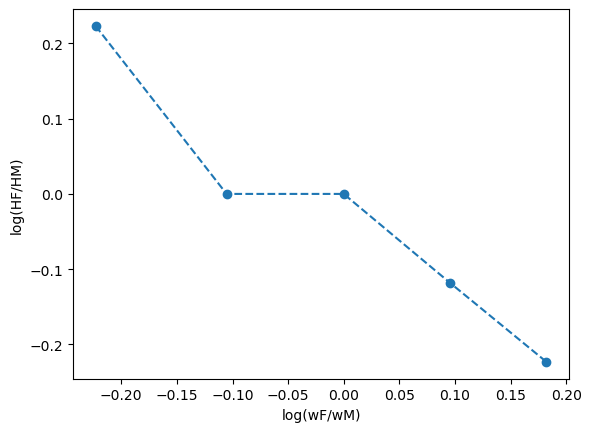

In [3]:
import math
import matplotlib.pyplot as plt

# Question 2
# safe the Class as Model
model = HouseholdSpecializationModelClass()

# create an empty list for the log HF/HM
log_HF_HM = []

# loop over the different elements in wF_vec
for i in model.par.wF_vec:
    model.par.wF = i # set i to model.par.wF
    discrete = model.solve_discrete() # solve the model for the different wF's
    HF = discrete.HF # rename the solutions for HF and HM
    HM = discrete.HM
    log_HF_HM.append(math.log(HF/HM)) # append the log of HF/HM to the empty list log_HF_HM

# create an empty list for the log WF/WM
log_WF_WM = [] 

# loop over the different elements in wF_vec
for j in model.par.wF_vec:
    log_WF_WM.append(math.log(j/1)) # append the log of WF/WM to the empty list log_WF_WM (WM is constantly 1)

# cut the solution lists to the first 3 decimal places
formatted_log_HF_HM = ['{:.3f}'.format(num) for num in log_HF_HM]
formatted_log_WF_WM = ['{:.3f}'.format(num) for num in log_WF_WM]

# Header
print('The optimal ratios of log HF/HM and log wF/wM')

# Print the optimal solutions for the ratios
print(' log_HF_HM = ', formatted_log_HF_HM, '\n', 'log_WF_WM = ', formatted_log_WF_WM)

# Plotting the optimal ratios
plt.plot(log_WF_WM, log_HF_HM, 'o--')
plt.ylabel("log(HF/HM)")
plt.xlabel("log(wF/wM)")

# Header
print('\n', '\n', 'Visualisation of log HF/HM and logwF/wM')

# show the plot
plt.show()


    

# Question 3

Explain your code and procedure

The optimal values of LM, LF, HM, HF depending on wF
wF=0.8  -->  LM=5.889, LF=2.87, HM=4.093, HF=5.116
wF=0.9  -->  LM=5.168, LF=3.75, HM=4.271, HF=4.746
wF=1.0  -->  LM=4.455, LF=4.45, HM=4.455, HF=4.454
wF=1.1  -->  LM=3.760, LF=5.02, HM=4.642, HF=4.220
wF=1.2  -->  LM=3.090, LF=5.48, HM=4.833, HF=4.027

 
 The results as Dataframe
 wF       LM       LF       HM       HF
0.8 5.889247 2.869815 4.092548 5.115672
0.9 5.167743 3.749315 4.271034 4.745632
1.0 4.454502 4.454545 4.454509 4.454444
1.1 3.759784 5.021980 4.641950 4.219941
1.2 3.089705 5.479613 4.832678 4.027193

 
 The visualization of the log(HF/HM) against the log(wF/wM)


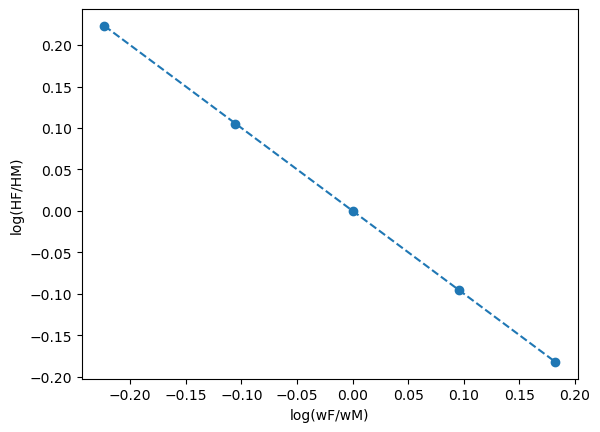

In [4]:
import matplotlib.pyplot as plt
# Question 3
# save the class as 'model'
model = HouseholdSpecializationModelClass()

# A. define an empty list to store the results from the upcoming for loop
optimal_values = []

# Printing a heading
print('The optimal values of LM, LF, HM, HF depending on wF')

# B. creating a for loop to solve the model for varying wF's
for wF in model.par.wF_vec:
    model.par.wF = wF
    model.solve_continous() # solve the model for the different values of wF
    optimal_values.append((wF, model.sol.LM, model.sol.LF, model.sol.HM, model.sol.HF)) # append the solutions to the empty list 'optimal_values'
    print(f"wF={wF:.1f}  -->  LM={model.sol.LM:.3f}, LF={model.sol.LF:.2f}, HM={model.sol.HM:.3f}, HF={model.sol.HF:.3f}") # printing the results

# C. Convert the results to a pandas DataFrame for easier manipulation
df = pd.DataFrame(optimal_values, columns=["wF", "LM", "LF", "HM", "HF"]) # create the dataFrame df with the results from above
print('\n', '\n', "The results as Dataframe") # Printing a header
print(df.to_string(index=False)) # printing the DataFrame with excluding the index column

# D. extract colums from Pandas Data Frame and store them as new lists
a1 = df['HF'].tolist()
a2 = df['HM'].tolist()
a3 = df['wF'].tolist()

# E. Take the logs of the ratios HF/HM and wF/wM
log_a1_a2 = [math.log(a1[i] / a2[i]) for i in range(len(a1))]
log_a3 = [math.log(a3[i]) for i in range(len(a3))]

# Plot the log ratios
plt.plot(log_a3, log_a1_a2, 'o--')
plt.ylabel("log(HF/HM)")
plt.xlabel("log(wF/wM)")
print('\n', '\n', 'The visualization of the log(HF/HM) against the log(wF/wM)') # Header
plt.show()

ADD CONCISE CONLUSION.

# Question 4

In [14]:
# Solution with changing alpha and sigma manually to get narrow bounds

model = HouseholdSpecializationModelClass()

#manually change alpha and sigma to narrow in bounds for optimizer
model.par.alpha = 0.9
model.par.sigma = 0.1

#create empty lists used later for plotting and to create numpy arrays
placeholder_HF = []
placeholder_HM = []

for wF in model.par.wF_vec:
    model.par.wF = wF
    model.solve_continous() # solve the model for the different values of wF
    optimal_values.append((wF, model.sol.LM, model.sol.LF, model.sol.HM, model.sol.HF)) # append the solutions to the empty list 'optimal_values'
    placeholder_HF.append(model.sol.HF)
    placeholder_HM.append(model.sol.HM)

#create numpy arrays to feed into the regression function
k = np.array(placeholder_HF)
l = np.array(placeholder_HM)
model.sol.HF_vec = k
model.sol.HM_vec = l


print("We used manual inputs of alpha and sigma to narrow the bounds.")
print("For Alpha = ", model.par.alpha, "and Sigma = ", model.par.sigma, "we get the following betas:")

model.run_regression()

print("beta0: ", model.sol.beta0)
print("beta1: ", model.sol.beta1)





We used manual inputs of alpha and sigma to narrow the bounds.
For Alpha =  0.9 and Sigma =  0.1 we get the following betas:
beta0:  0.21972367798615558
beta1:  -0.09998660922252828


In [12]:
#Feed narrow bounds into optimizer:

bounds = ((0.9, 1), (0, 0.1))

model.estimate()

# Print the optimal values of alpha and sigma
print("The optimal values are: Alpha = ", model.par.alpha, "and Sigma = ", model.par.sigma)
print("We arrive at: beta0 = ", model.sol.beta0, "and beta1 = ", model.sol.beta1)


The optimal values are: Alpha =  0.9820094105820462 and Sigma =  0.1
We arrive at: beta0 =  0.39957318397042535 and beta1 =  -0.0999077730776126


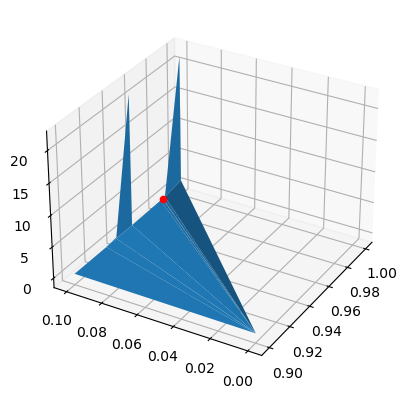

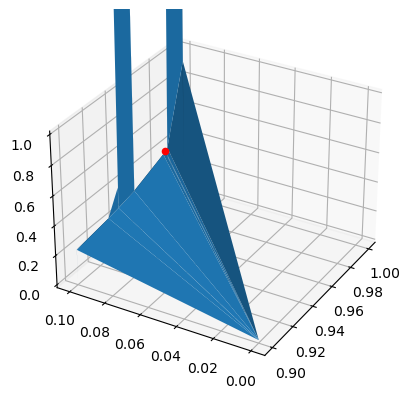

In [9]:
#graphs

model = HouseholdSpecializationModelClass()

model.estimate()

model.graphics_unlimited()

model.graphics_limited()

Economic Interpretation of the results for beta0, beta1 and how the mdoel fits the data: 


Beta 0:
The larger beta 0 becomes the more women work in comparison to men. If the term is negative men work more in comparison to women. In the case of a positve beta 0 women work ceteris paribus relatively more than men. As we find a positice beta 0 we come the concluision that with our data women work more than men, when only looking at beta 0. The beta of 0.4 just shows the extent of this effect.


Beta 1: 

If beta 1 is 0 the ratio between the two wages has no effect on log(HF/HM). In our case we find a negative beta 1 which suggest that an increase in wages for women or a decrease of mens wages leads to women working realitively less. This behavior could correspond to the income effect. In our case a realtive increase in wages for women would lead to relatively lower working hours for women as they would need less time than men to achieve the same wage as before.

Model fit: 

When we compare our results for for the two betas we can see that we come very close to their results. We can reach simialr results with our data. 

# Question 5


In [ ]:
# Question 5

